### Reference

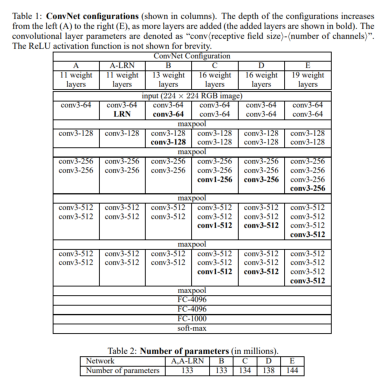

In [9]:
import matplotlib.pyplot as plt
image = plt.imread('./data/0705-VGGnet_Configurations.PNG')
plt.imshow(image)
plt.axis('off')
plt.show()

### Preparation

In [1]:
# Import modules
import torch
import torch.nn as nn

### Define a Class

: Demonstrate 'D' configuration (VGG16)

e.g. 'conv3-64'  
    - Size of kernel: 3  
    - Size of output: 64  

- Reasons of adding more layers
  e.g.
    con3-256
    con3-256
    con3-256
  - Increase ability to represent models
    - Increase ability to represent models by adding more Convolutional Layers
  - Add complexity of features
    - Increase the ability to find more complex features
    - Find the first features -> Figure out the second features based on characteristics of the first features

In [ ]:
# Define a code
class VGG16(nn.Module):
    
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        
        self.features = nn.Sequential(
        
            ##### input(224x224 RGB image)
            # Layer 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.Relu(inplace = True),  # Linear -> Non-Linear
            
            # Layer 2
            nn.conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),            
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            
            
            ##### The first Maxpool
            # Layer 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1)
            nn.ReLU(inplace = True),
            
            # Layer 4
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            
            ##### The second Maxpool
            # Layer 5
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            
            # Layer 6
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            
            # Layer 7
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            nn.maxPool2d(kernel_size=2, stride=2),
            
            
            ##### The thrid Maxpool
            # Layer 8
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            
            # Layer 9
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            
            # Layer 10
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            
            ##### The fourth Maxpool
            # Layer 11
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            
            # Layer 12
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            
            # Layer 13
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        ###### Average PoolingReduce dimension
        # Reasons of using Average Pooling instead of Max Pooling
        #  - Output size is consistent => Various sizes of input images are available
        #  - If Max Pooling is used, only fixed size of images are used
        # Layer 14
        self.avgpool = nn.AdaptiveAvgPool2d(7, 7)
        
        
        self.classifier = nn.Sequential(
            # Layer 15
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace = True),
            nn.Dropout(),
            
            # Layer 16
            nn.Linear(4096, 4096),
            nn.ReLU(inplace = True),
            nn.Dropout(),
            
            # Layer 17
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        # Call Feature Extractor
        x = self.features(x)
        
        # Average Pooling
        x = self.avgpool(x)
        
        # Flat the result
        x = torch.flatten(x, 1)
        
        # Apply classifiers
        x = self.classfier(x)
        
        return x